# Bagging

- 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킴

- 분류기가 predict_proba() 메소드를 지원하는 경우 확률값을 평균하여 예측을 수행

- 없는 경우 가장 빈도가 높은 클래스 레이블이 예측 결과가 됨

In [1]:
# !pip install mglearn

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=66)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# oob_score : 부스트래핑에 포함되지 않는 샘플을 기반으로 훈련된 모델을 평가
model = BaggingClassifier(LogisticRegression(solver='liblinear'),
                         n_estimators=100,
                         oob_score=True,
                         n_jobs=-1,
                         random_state=42)

model.fit(X_train,y_train)
# 평가
model.score(X_train, y_train), model.score(X_train, y_train)

(0.9530516431924883, 0.9530516431924883)

#### Bagging 실습 01

결정트리로 배깅을 수행 (two_moon 데이터 셋 적용)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [6]:
# BaggingClassifier 모델 학습
# n_estimators=5
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(DecisionTreeClassifier(),
                         n_estimators=5,
                         n_jobs=1,
                         random_state=42)

model.fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9866666666666667, 0.88)

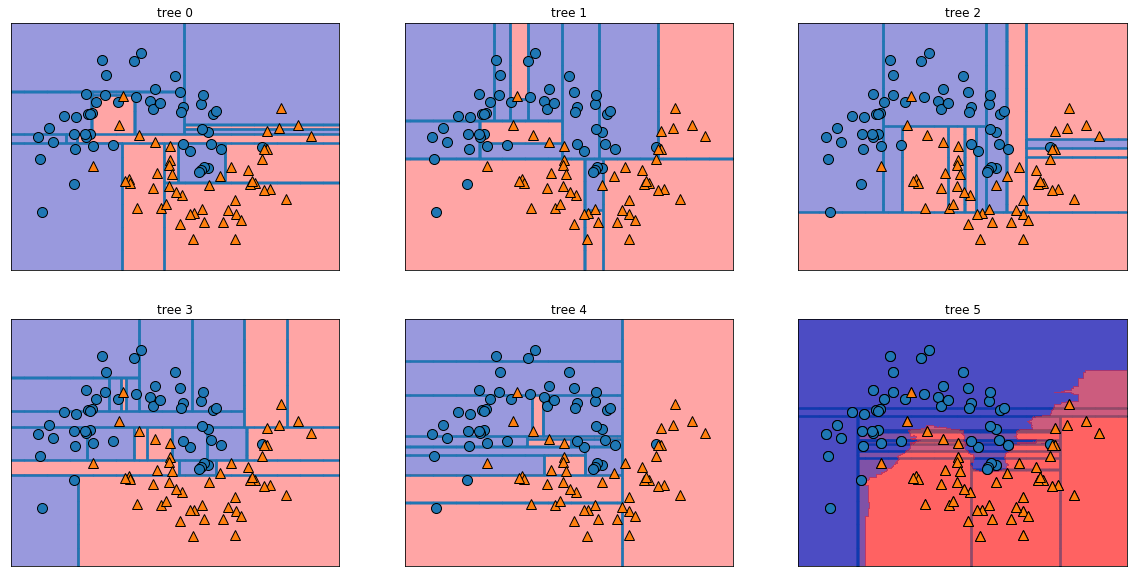

In [12]:
# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i , (ax, tree) in enumerate(zip(axes.ravel(), model.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# 배깅으로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model, X, fill=True, ax=axes[-1, -1], alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [9]:
# BaggingClassifier 모델 학습
# n_estimator=100으로 설정한 경우
model = BaggingClassifier(DecisionTreeClassifier(splitter='random'),
                         n_estimators=100,
                         n_jobs=1,
                         random_state=42)

model.fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.92)

- 배깅은 랜덤포레스트와 달리 max_samples 매개변수에서 부스트랩 샘플의 크기를 지정할 수 있음
- 랜덤포레스트는 DecisionTreeClassifier(splitter='best')를 사용하도록 고정되어 있음
- 결정트리를 splitter='random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음

# Extra Tree

- 랜덤포레스트와 비슷하지만 최적의 임계값을 찾는 대신 후보 특성을 사용해 무작위로 분할한 다음 그중에서 최상의 분할을 선택
- 극단적으로 무작위한 트리의 랜덤 포레스트를 익스트림 랜덤 트리(extremely randomized tree) 또는 줄여서 엑스트라 트리(extra-tree)라고 부름

- 부스트랩 샘플링은 적용하지 않음

- 무작위성을 증가시키면 일반적으로 모델의 편향이 증가하지만 분산이 감소

- 예측방식은 랜덤포래스트와 동일하게 각 트리가 만든 확률값을 평균

In [14]:
# ExtraTreesClassifier 모델 학습
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=5, random_state=42)
model.fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.84)

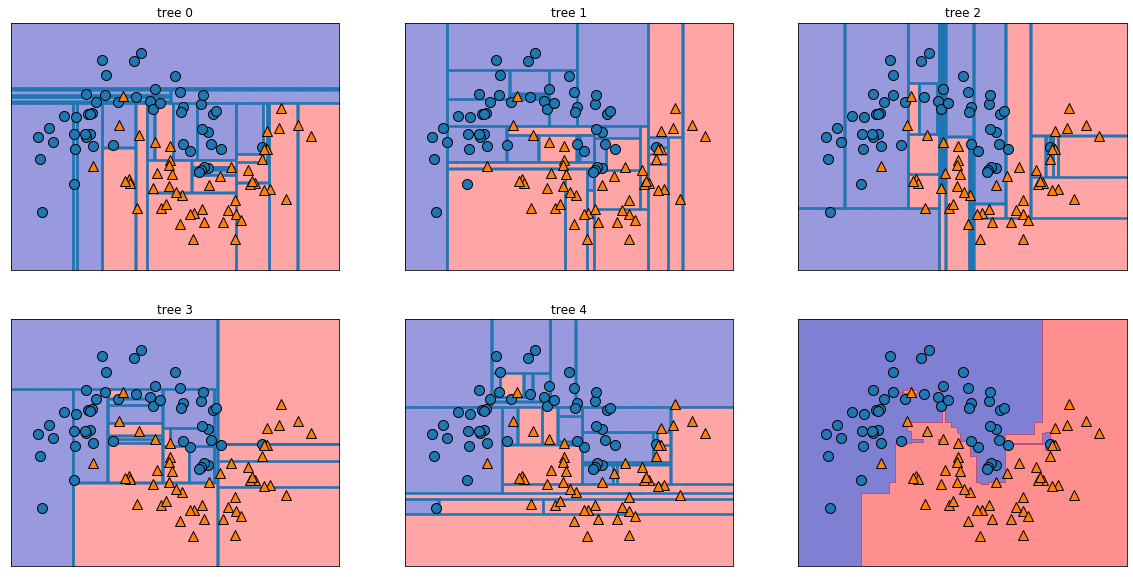

In [15]:
# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i , (ax, tree) in enumerate(zip(axes.ravel(), model.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# Extra tree로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model, X, fill=True, ax=axes[-1, -1], alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

#### Extra Tree 실습 01

n_estimator=100으로 설정한 경우 (유방암 데이터 세트에 적용)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

In [22]:
# ExtraTreesClassifier 모델 학습
model = ExtraTreesClassifier(n_estimators=100,
                            random_state=42)

model.fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.951048951048951)

- 엑스트라 트리는 랜덤 포레스트와 거의 같은 성능을 냄

- 엑스트라 트리는 계산 비용이 적지만 무작위 분할 때문에 일반화 성능을 높이려면 많은 트리가 필요하다는 문제

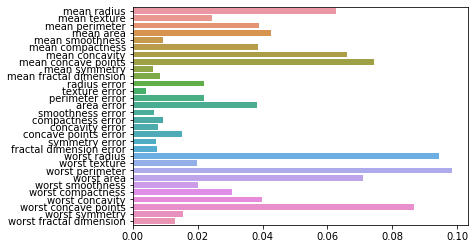

In [23]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(model.feature_importances_, y=cancer.feature_names)